In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge,Lasso,LinearRegression
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_regression

In [252]:
data = pd.read_csv('trainingData.csv')

In [253]:
data.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


In [254]:
data.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


## Descriptive Analytics

In [255]:
data.isnull().sum()

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [256]:
clean_data = data.drop(columns=['Id']).dropna()
clean_data.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0
5,Nuapada,23,F,OBC,General store,none,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


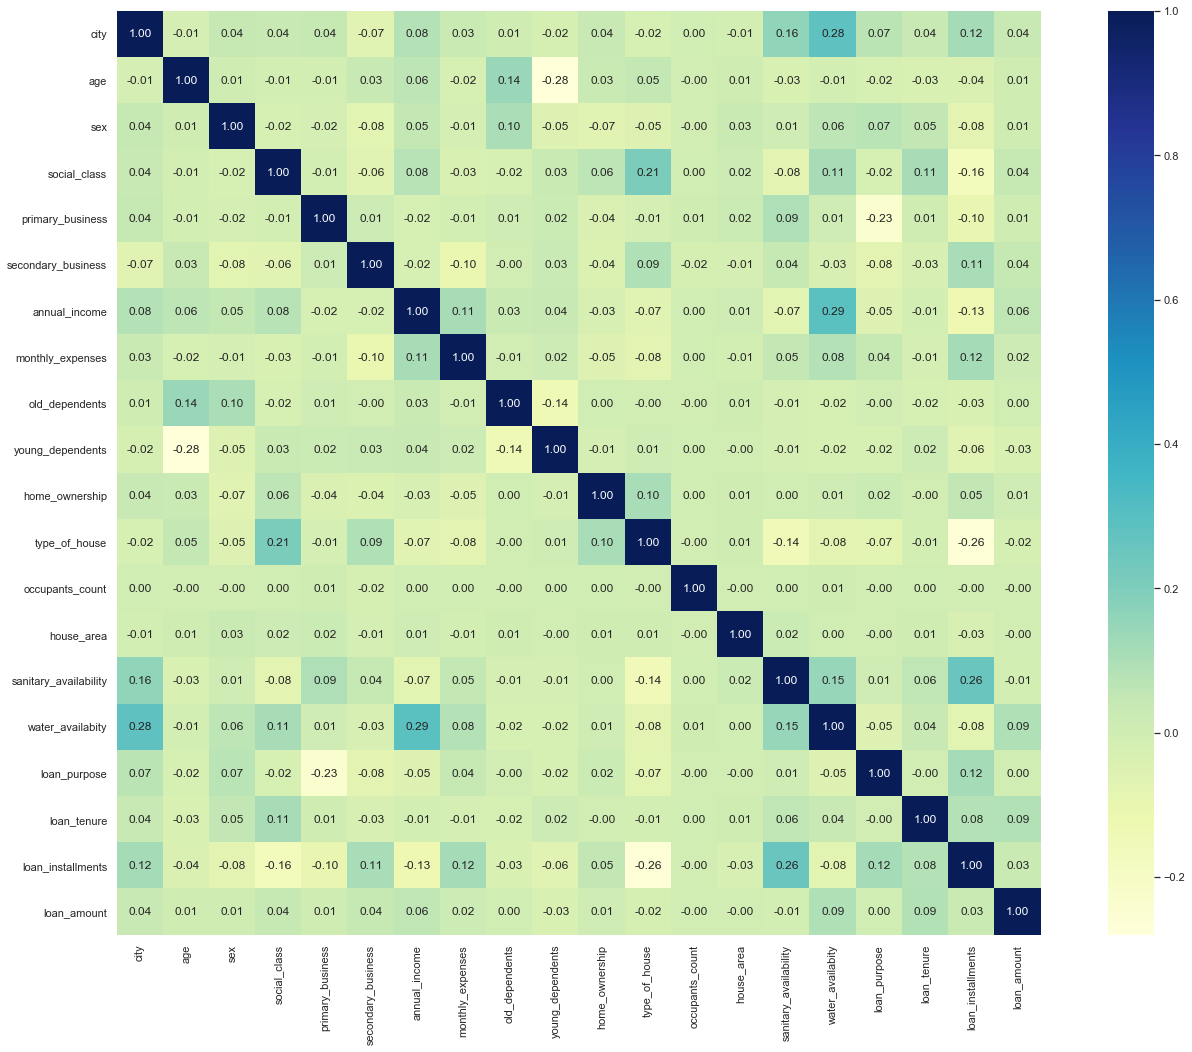

In [257]:
sns.set()
plot_data = clean_data.copy(deep=True)
le = LabelEncoder()
for label in ['city','sex','social_class','primary_business','secondary_business','type_of_house','loan_purpose']:
    plot_data[label] = le.fit_transform(plot_data[label])
plt.figure(figsize=(24,17))
ax = sns.heatmap(plot_data.corr(),cmap="YlGnBu", square=True,annot=True, fmt=".2f")

F     30950
M      2110
TG        5
Name: sex, dtype: int64


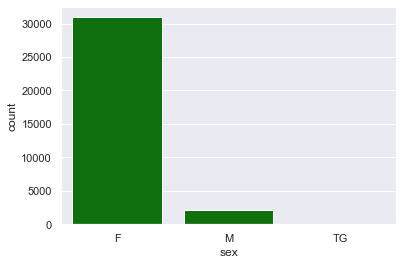

In [258]:
print(clean_data['sex'].value_counts())
sns.countplot(clean_data['sex'], color='green')

In [259]:
clean_data['city'].value_counts()

Pusad            2782
Bahoriband       1978
PUSAD            1775
Shantipur        1727
Imphal           1699
                 ... 
Satwas              1
Periapatna          1
Impha West          1
BISHALAKHINDA       1
Plakkad             1
Name: city, Length: 521, dtype: int64

Apparels                           6216
Agro Based Businesses              3995
Handicrafts                        3624
Meat Businesses                    3574
Animal husbandry                   3398
Farming/ Agriculture               2449
Education Loan                     1856
Eateries                           1588
Retail Store                       1502
Business Services - II              710
Tobacco Related Activities          646
Construction Related Activities     507
Artifical Jewellry Selling          504
Retail Sale                         432
Flower Business                     227
Food Items                          225
Carpentery work                     221
Business Services - I               215
Transportation Services             198
Beauty Salon                        176
Repair Services                     161
Laundry Services                    127
Utensil Selling                     104
Sanitation                          101
Recycling/ Waste Management          66


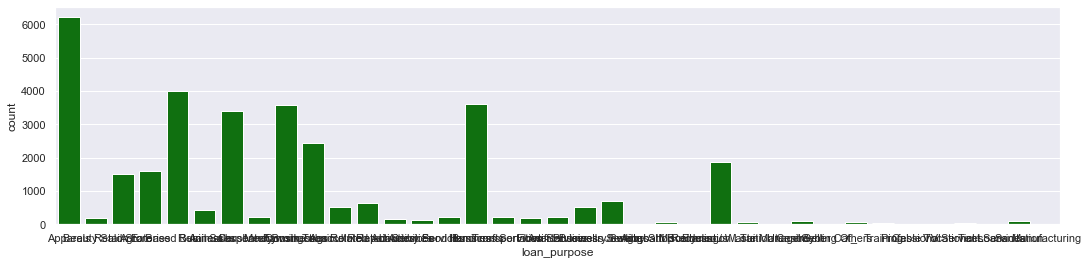

In [260]:
plt.figure(figsize=(18,4))
print(clean_data['loan_purpose'].value_counts())
sns.countplot(clean_data['loan_purpose'], color='green')

In [261]:
clean_data['social_class'].value_counts()

OBC                9898
SC                 2844
ST                 2577
General            2181
Muslim             1707
                   ... 
Telagu  Kamathi       1
Minirity              1
Chambahr              1
Devanga               1
Nil                   1
Name: social_class, Length: 496, dtype: int64

In [262]:
clean_data['primary_business'].value_counts()

Tailoring                   3339
Handloom Work               2064
Goat rearing                1921
Cow Rearing                 1529
Grocery store               1292
                            ... 
SATOO BUSINESS                 1
Coffee Business                1
Computer training centre       1
Rice Selling                   1
Poultry feed center            1
Name: primary_business, Length: 422, dtype: int64

none                   26067
Others                  2538
Daily wage labourer     2330
Agriculture             1966
Livestock rearing        164
Name: secondary_business, dtype: int64


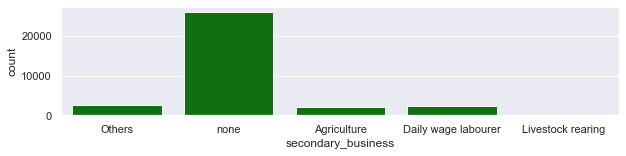

In [263]:
plt.figure(figsize=(10,2))
print(clean_data['secondary_business'].value_counts())
sns.countplot(clean_data['secondary_business'], color='green')

T2    15234
T1    12758
R      5073
Name: type_of_house, dtype: int64


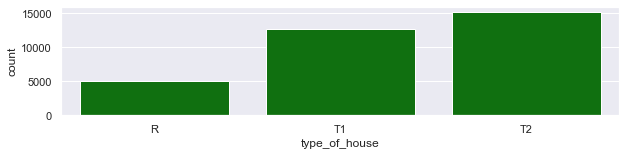

In [264]:
plt.figure(figsize=(10,2))
print(clean_data['type_of_house'].value_counts())
sns.countplot(clean_data['type_of_house'], color='green')

## Preprocessing

In [265]:
clean_data = pd.get_dummies(data.drop(columns=['Id']).dropna(), columns= ['city','sex','social_class','primary_business','secondary_business','type_of_house','loan_purpose'])

In [266]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(clean_data.loc[:,clean_data.columns != 'loan_amount'])
y = sc_y.fit_transform(clean_data.loc[:,clean_data.columns == 'loan_amount'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

## Feature Selection

In [267]:
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfscores['column'] = clean_data.columns.drop('loan_amount')
dfscores['pvalue'] = bestfeatures.pvalues_
dfscores.columns = ['score','column','pvalue']

In [268]:
best_features = dfscores[dfscores['pvalue'] <= 0.05]

In [269]:
for feature in best_features['column']:
    if "loan_purpose" in feature:
        print(feature)

loan_purpose_Agro Based Businesses
loan_purpose_Business Services - II
loan_purpose_Education Loan
loan_purpose_Handicrafts
loan_purpose_Manufacturing
loan_purpose_Meat Businesses
loan_purpose_Recycling/ Waste Management
loan_purpose_Retail Store
loan_purpose_Sanitation
loan_purpose_Tobacco Related Activities
loan_purpose_Training
loan_purpose_Vocational Loans


In [270]:
bestfeatures = SelectKBest(score_func=f_regression, k=best_features.shape[0])
fit = bestfeatures.fit(X_train,y_train)

## Prediction

MSE:1.2302, R2:0.5611


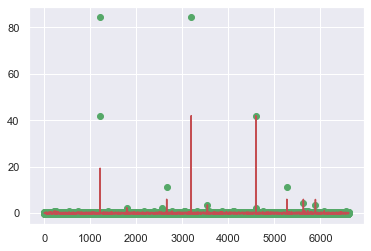

In [271]:
model = Ridge(random_state =42)
model.fit(fit.transform(X_train),y_train)
y_pred = model.predict(fit.transform(X_test))
print(f"MSE:{mean_squared_error(y_test,y_pred):.4f}, R2:{r2_score(y_test,y_pred):.4f}")
plt.scatter(range(y_test.shape[0]),y_test,color='g')
plt.plot(range(y_test.shape[0]),y_pred,color='r')